In [51]:
import numpy as np 
import pandas as pd
import datetime, csv ,os ,pprint
import matplotlib.pyplot as plt
import seaborn as sns


## Import data and get ready for Tableau first run 

In [10]:
test = pd.read_csv("D:\\William\\Jupyter\\Titanic Tableau\\test.csv")
train = pd.read_csv("D:\\William\\Jupyter\\Titanic Tableau\\train.csv")
testpt2 = pd.read_csv("D:\\William\\Jupyter\\Titanic Tableau\\gender_submission.csv")
print(test.head(1), '\n')
print(testpt2.head(1), '\n' )
print(train.head(1), '\n')

   PassengerId  Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  330911   

     Fare Cabin Embarked  
0  7.8292   NaN        Q   

   PassengerId  Survived
0          892         0 

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S   



In [16]:
testfull = pd.merge(test, testpt2 , on= "PassengerId")
print(testfull.shape)
print(test.shape)
print(testpt2.shape)

(418, 12)
(418, 11)
(418, 2)


In [22]:
testfull['file'] = 'test'
train['file'] = 'train'

In [23]:
fulltableau = train.append(testfull)
print(testfull.shape)
print(train.shape)
print(fulltableau.shape)

(418, 13)
(891, 13)
(1309, 13)


In [24]:
fulltableau.to_csv("D:\\William\\Jupyter\\Titanic Tableau\\explore_data2tableau.csv" , index = False)

## Note that this can be done with either R and/or Python integration but for Tableau public ...

In [27]:
trainmodel = pd.read_csv("D:\\William\\Jupyter\\Titanic Tableau\\Tableau_Export_crosstab.csv")
trainmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Passenger Id     1309 non-null int64
NewEmbarked      1309 non-null object
Pclass           1309 non-null int64
AgeBin           1309 non-null int64
New age          1309 non-null int64
Titles           1309 non-null object
Embarked         1307 non-null object
FareBin          1309 non-null int64
Fare             1308 non-null float64
Survived         1309 non-null int64
Sex              1309 non-null object
File             1309 non-null object
Total_Company    1309 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 133.0+ KB


In [30]:
trainmodel.columns

Index(['Passenger Id', 'NewEmbarked', 'Pclass', 'AgeBin', 'New age', 'Titles',
       'Embarked', 'FareBin', 'Fare', 'Survived', 'Sex', 'File',
       'Total_Company'],
      dtype='object')

In [45]:
#trainmodel_trans
trainmodel_trans = trainmodel.copy()
trainmodel_trans['Sex'].replace(['male','female'],[0,1],inplace=True)
trainmodel_trans['NewEmbarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
trainmodel_trans['Titles'].replace(['Mr','Ms','Honorary','Officer'],[0,1,2,3],inplace=True)

In [97]:
train , test  = trainmodel_trans[trainmodel_trans['File']== 'train'] , trainmodel_trans[trainmodel_trans['File'] != 'train']
print(train.shape , test.shape)
features = ['Pclass', 'AgeBin', 'Titles','NewEmbarked', 'FareBin', 'Sex','Total_Company']
train_x , test_x = train[features] , test[features]
train_y , test_y = train['Survived'] , test['Survived']
print(train_x.shape , test_x.shape, train_y.shape , test_y.shape)

(891, 13) (418, 13)
(891, 7) (418, 7) (891,) (418,)


In [47]:
train_x.head()

,Pclass,AgeBin,Titles,NewEmbarked,FareBin,Sex,Total_Company
0,3,1,0,0,0,0,1
1,1,2,1,1,5,1,1
2,3,1,1,0,1,1,0
3,1,2,1,0,5,1,1
4,3,2,0,0,1,0,0


In [48]:
train_x.isnull().any()

Pclass           False
AgeBin           False
Titles           False
NewEmbarked      False
FareBin          False
Sex              False
Total_Company    False
dtype: bool

The accuracy of the Logistic Regression model is 	 0.8899521531100478


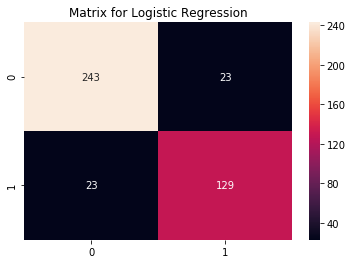

[-0.01084865 -0.53507607 -0.46048421  0.50679804  0.21541457  0.29015168
  1.31723993 -0.23924154]
       variables  Coefficients  Standard Errors  t values  Probabilites
0       Constant       -0.0108            0.135    -0.080         0.936
1         Pclass       -0.5351            0.037   -14.294         0.000
2         AgeBin       -0.4605            0.025   -18.371         0.000
3         Titles        0.5068            0.061     8.271         0.000
4    NewEmbarked        0.2154            0.025     8.691         0.000
5        FareBin        0.2902            0.019    15.635         0.000
6            Sex        1.3172            0.068    19.284         0.000
7  Total_Company       -0.2392            0.014   -17.248         0.000 





The accuracy of the Decision Tree is 			 0.8133971291866029


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


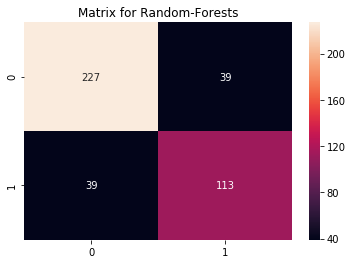

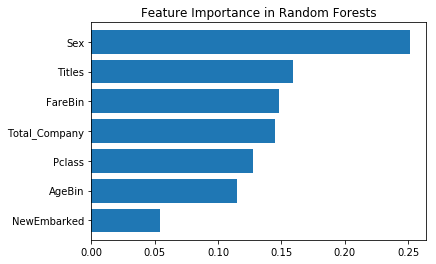

In [100]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from scipy import stats
# Logistic Regression
lr_model = LogisticRegression(C=0.05,solver='liblinear')
lr_model.fit(train_x,train_y.values.ravel())
lr_prediction = lr_model.predict(test_x)
lr_pred = lr_model.predict_proba(test_x)
print('The accuracy of the Logistic Regression model is \t',metrics.accuracy_score(lr_prediction,test_y))
sns.heatmap(confusion_matrix(test_y,lr_prediction),annot=True,fmt='2.0f')
plt.title('Matrix for Logistic Regression')
plt.show()
params = np.append(lr_model.intercept_,lr_model.coef_)
print(params)

newX = pd.DataFrame({"Constant":np.ones(len(test_x))}).join(pd.DataFrame(test_x.reset_index()))
newX.drop("index",axis =1,  inplace=True)
MSE = (sum((test_y-lr_prediction)**2))/(len(newX)-len(newX.columns))
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
features = ['Pclass', 'AgeBin', 'Titles','NewEmbarked', 'FareBin', 'Sex','Total_Company']
varslst = features
varslst.insert(0,"Constant")
myDF3['variables'],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [varslst,params,sd_b,ts_b,p_values]
print(myDF3, '\n\n\n\n\n')

# Decision Tree
rf_model = RandomForestClassifier()
rf_model.fit(train_x,train_y)
rf_prediction = rf_model.predict(test_x)
rf_pred = rf_model.predict_proba(test_x)
print('The accuracy of the Decision Tree is \t\t\t',metrics.accuracy_score(rf_prediction,test_y))
sns.heatmap(confusion_matrix(test_y,rf_prediction),annot=True,fmt='2.0f')
plt.title('Matrix for Random-Forests')
plt.show()

pd.Series(rf_model.feature_importances_,train_x.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in Random Forests')
plt.show()